# **Problemas de Clasificación**

## Ejercicio 1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = np.loadtxt('P1_3.txt')

In [ ]:
data = np.delete(data, 1, axis=1)

In [ ]:
df = pd.DataFrame(data)

### 1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(df[0].value_counts())

2.0    1496
1.0     298
Name: 0, dtype: int64


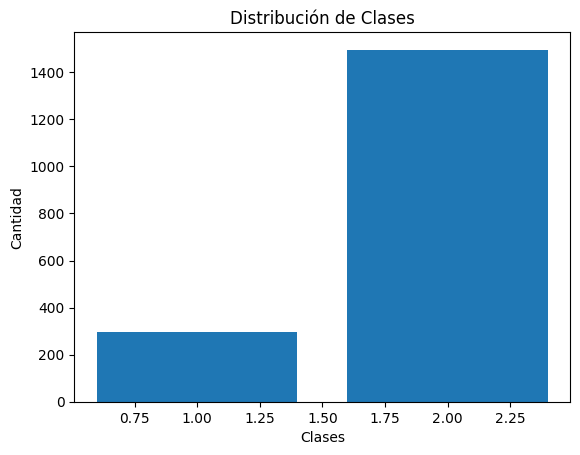

In [ ]:
classes = df[0].value_counts()
plt.bar(classes.index, classes.values)
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases')
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
x = data[:,1:]
y = data[:,0]

In [ ]:
xdf = df.iloc[:,1:]
ydf = df.iloc[:,0]

In [ ]:
undersample_str = {
    1: 298,
    2: 298
}

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy=undersample_str, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(x, y)

In [ ]:
df = pd.DataFrame(X_resampled, columns=xdf.columns)
df[0] = y_resampled

In [ ]:
print(df[0].value_counts())

1.0    298
2.0    298
Name: 0, dtype: int64


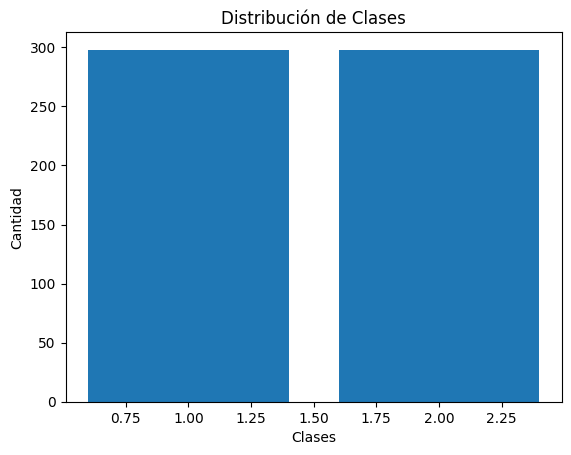

In [ ]:
classes = df[0].value_counts()
plt.bar(classes.index, classes.values)
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases')
plt.show()

### 2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report

#### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df[0], test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='linear', C=1)

In [ ]:
pred = cross_val_predict(svm_model, X_resampled, y_resampled, cv=5)

In [ ]:
class_report_svm = classification_report(y_resampled, pred)
print(class_report_svm)

              precision    recall  f1-score   support

         1.0       0.81      0.81      0.81       298
         2.0       0.81      0.81      0.81       298

    accuracy                           0.81       596
   macro avg       0.81      0.81      0.81       596
weighted avg       0.81      0.81      0.81       596



#### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reglog_model = LogisticRegression()

In [ ]:
pred = cross_val_predict(reglog_model, X_resampled, y_resampled, cv=5)

In [ ]:
class_report_reglog = classification_report(y_resampled, pred)
print(class_report_reglog)

              precision    recall  f1-score   support

         1.0       0.80      0.84      0.82       298
         2.0       0.83      0.80      0.81       298

    accuracy                           0.82       596
   macro avg       0.82      0.82      0.82       596
weighted avg       0.82      0.82      0.82       596



#### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
pred = cross_val_predict(knn_model, X_resampled, y_resampled, cv=5)

In [ ]:
class_report_knn = classification_report(y_resampled, pred)
print(class_report_knn)

              precision    recall  f1-score   support

         1.0       0.77      0.79      0.78       298
         2.0       0.78      0.77      0.77       298

    accuracy                           0.78       596
   macro avg       0.78      0.78      0.78       596
weighted avg       0.78      0.78      0.78       596



#### Árboles de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=5)

In [ ]:
pred = cross_val_predict(tree_model, X_resampled, y_resampled, cv=5)

In [ ]:
class_report_tree = classification_report(y_resampled, pred)
print(class_report_tree)

              precision    recall  f1-score   support

         1.0       0.73      0.68      0.70       298
         2.0       0.70      0.75      0.72       298

    accuracy                           0.71       596
   macro avg       0.72      0.71      0.71       596
weighted avg       0.72      0.71      0.71       596



#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes_model = GaussianNB()

In [ ]:
pred = cross_val_predict(naive_bayes_model, X_resampled, y_resampled, cv=5)

In [ ]:
class_report_bayes = classification_report(y_resampled, pred)
print(class_report_bayes)

              precision    recall  f1-score   support

         1.0       0.85      0.85      0.85       298
         2.0       0.85      0.85      0.85       298

    accuracy                           0.85       596
   macro avg       0.85      0.85      0.85       596
weighted avg       0.85      0.85      0.85       596



### 3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df[0], test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
class_report = classification_report(y_resampled, pred)
print(class_report)

              precision    recall  f1-score   support

         1.0       0.85      0.85      0.85       298
         2.0       0.85      0.85      0.85       298

    accuracy                           0.85       596
   macro avg       0.85      0.85      0.85       596
weighted avg       0.85      0.85      0.85       596



#### 4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=5)

In [ ]:
tree_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=5)

In [ ]:
feature_importance = tree_model.feature_importances_

In [ ]:
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]

In [ ]:
best_score = 0.0
best_features_filter = 0

In [ ]:
for num_features in range(1, len(sorted_indices) + 1):
    selected_features_filter = sorted_indices[:num_features]
    X_selected = X_resampled[:, selected_features_filter]
    scores = cross_val_score(tree_model, X_selected, y_resampled, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_features_filter = num_features

In [ ]:
print("Número óptimo de características:", best_features_filter)
print("Score con características seleccionadas:", best_score)

Número óptimo de características: 12
Score con características seleccionadas: 0.7650140056022409


### 5. Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=5)

In [ ]:
best_features_wrapper = []
best_num_features_wrapper = 0
best_score = 0.0

In [ ]:
for feature in range(X_resampled.shape[1]):
    selected_features_wrapper = best_features_wrapper + [feature]
    pred = cross_val_predict(tree_model, X_resampled[:, selected_features_wrapper], y_resampled, cv=5)
    class_report_tree = classification_report(y_resampled, pred, output_dict=True)
    f1_score = class_report_tree['weighted avg']['f1-score']
    if f1_score > best_score:
        best_score = f1_score
        best_num_features_wrapper = len(selected_features_wrapper)

In [ ]:
print("Número óptimo de características:", best_num_features_wrapper)
print("Mejor puntuación (F1-score):", best_score)

Número óptimo de características: 1
Mejor puntuación (F1-score): 0.6799586324854319


### 6. Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.

In [ ]:
from itertools import combinations

In [ ]:
min_features = 1
max_features = X_resampled.shape[1]

In [ ]:
best_accuracy = 0
best_feature_subset = None

In [ ]:
for num_features in range(min_features, max_features + 1):
    feature_combinations = list(combinations(range(X_resampled.shape[1]), num_features))
    for feature_set in feature_combinations:
        X_subset = X_resampled[:, feature_set]
        tree_model = DecisionTreeClassifier(max_depth=5)
        pred = cross_val_predict(tree_model, X_subset, y_resampled, cv=5)
        accuracy = accuracy_score(y_resampled, pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_subset = feature_set

In [ ]:
print("Número óptimo de características:", len(best_feature_subset))
print("Mejor precisión:", best_accuracy)

Número óptimo de características: 3
Mejor precisión: 0.7651006711409396


### 6. Escoge alguna de las técnicas de selección de características que probaste con anterioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:

#### A. Aplica el método de selección de características con todos los datos.

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=5)

In [ ]:
tree_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=5)

In [ ]:
feature_importance = tree_model.feature_importances_

In [ ]:
sorted_indices = np.argsort(feature_importance)[::-1]

In [ ]:
selected_features = sorted_indices[:best_features_filter]

#### B. Ajusta el modelo con las características encontradas.

In [ ]:
adjusted_model = DecisionTreeClassifier(max_depth=5)

In [ ]:
production_model = DecisionTreeClassifier(max_depth=5)
production_model.fit(X_selected, y_resampled)

DecisionTreeClassifier(max_depth=5)

### 8. Contesta las siguientes preguntas:
a. **¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?**

Uno de los principales problemas de no considerar el problema del desbalanceo de datos es el sesgo que tiene en la métrica de evaluación, como la precisión. Un modelo puede lograr una alta precisión prediciendo la clase mayoritaria en todo momento, lo cual puede llegar a ser contraproducente, pues el modelo no estaría haciendo un buen trabajo en la clasificación de la clase minoritaria, que muchas veces es de mayor interés. El modelo puede aprender demasiado de la clase mayoritaria debido a la disponibilidad de más ejemplos y en muchos casos, los errores de clasificación en la clase minoritaria pueden tener consecuencias más graves o costosas que los errores en la clase mayoritaria. Es por esto que es de suma importancia abordar el problema de datos desbalanceados para tener un modelo de clasificación más efectivo, especialmente si la clase minoritaria tiene un interés significativo.

b. **De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.**

Los modelos que considero más adecuados son:
- Regresión Logística: debido a que es un clasificador lineal que funciona bien para problemas de clasificación binaria y multiclase. Además es interpretable y eficiente en términos computacionales.
- Árboles de Decisión: pues son modelos no lineales que pueden manejar datos categóricos. De igual manera, es adeacuado para problemas en los que las relaciones entre las características y la variable objetivo son complejas.
- Support Vector Machine (SVM): ya que es útil en la clasificación y puede funcionar bien en datos con muchas características. Además es adeacuado cuando los datos son linealmente separables o se pueden transformar para serlo.

c. **¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?**

 Sí, es posible reducir la dimensionalidad del problema sin perder rendimiento en el modelo, y hasta puede llegar a ser beneficioso. Al tener una gran cantidad de variables que representan las medidas de respuesta cerebral, el modelo puede volverse muy complejo y requerir una cantidad significativa de datos para evitar el sobreajuste. Reducir la dimensionalidad puede ayudar a simplificar el modelo y hacerlo más fácil de manejar. Al reducir la dimensionalidad, se disminuye la cantidad de información redundante que el modelo necesita aprender, se vuelve más fácil de interpretar y hace que los cálculos computacionales se vuelvan más eficientes.

d. **¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?**

 En este caso, en el que se están utilizando datos para predecir la respuesta cerebral de un sujeto a un estímulo visual cuando presta o no atención, el método de selección de características que considero el más adecuado es el de tipo Filter. Esto debido a que tiene más sentido evaluar la importancia de cada característica individualmente antes de utilizarlas en un modelo automático. Además este método es computacionalmente eficiente y rápido de calcular, lo cual ayuda mucho en este caso en el que se tiene un gran número de características en el conjunto de datos. Por otro lado, hace más fácil identificar características que no aportan información útil, lo cual ayudar a reducir la dimensionalidad del conjunto de datos, lo que puede mejorar la capacidad de generalización y evitar el sobreajuste.

e. **Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?**

 Se podrían normalizar los datos para asegurarnos de que se tiene una media de cero y una desviación estándar de uno, y así sea más sencillo la convergencia de los modelos. También se podría tomar en cuenta los valores atípicos que puedan afectar la calidad de los resultados. De igual manera, las técnicas de extracción de características avanzadas y de reducción de dimensionalidad pueden ayudar a mejorar la representación de las características y reducir la complejidad del modelo.

## Ejercicio 2

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = np.loadtxt('M_2.txt')

In [ ]:
data = np.delete(data, 1, axis=1)

In [ ]:
df = pd.DataFrame(data)

### 1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(df[0].value_counts())

1.0    90
2.0    90
3.0    90
4.0    90
5.0    90
6.0    90
7.0    90
Name: 0, dtype: int64


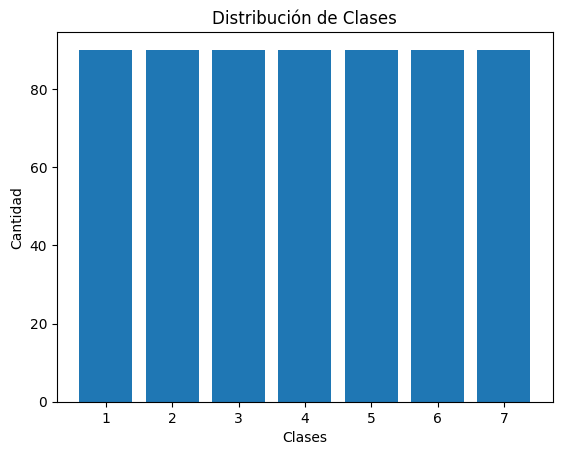

In [ ]:
classes = df[0].value_counts()
plt.bar(classes.index, classes.values)
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases')
plt.show()

### 2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
rand_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
y_pred = cross_val_predict(rand_forest_model, x, y, cv=5)

In [ ]:
class_report_rf = classification_report(y, y_pred)

In [ ]:
print(class_report_rf)

              precision    recall  f1-score   support

         1.0       0.85      0.89      0.87        90
         2.0       0.66      0.74      0.70        90
         3.0       0.93      0.91      0.92        90
         4.0       0.83      0.86      0.84        90
         5.0       0.65      0.57      0.61        90
         6.0       0.71      0.60      0.65        90
         7.0       0.88      0.97      0.92        90

    accuracy                           0.79       630
   macro avg       0.79      0.79      0.79       630
weighted avg       0.79      0.79      0.79       630



#### Gradiente Descendiente Estocástico

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_model = SGDClassifier(max_iter=1000, random_state=42)

In [ ]:
y_pred = cross_val_predict(sgd_model, x, y, cv=5)

In [ ]:
class_report_sgd = classification_report(y, y_pred)

In [ ]:
print(class_report_sgd)

              precision    recall  f1-score   support

         1.0       0.87      0.93      0.90        90
         2.0       0.55      0.71      0.62        90
         3.0       0.86      0.92      0.89        90
         4.0       0.90      0.84      0.87        90
         5.0       0.73      0.58      0.65        90
         6.0       0.65      0.61      0.63        90
         7.0       0.84      0.77      0.80        90

    accuracy                           0.77       630
   macro avg       0.77      0.77      0.77       630
weighted avg       0.77      0.77      0.77       630



#### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [ ]:
y_pred = cross_val_predict(adaboost_model, x, y, cv=5)

In [ ]:
class_report_adaboost = classification_report(y, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(class_report_adaboost)

              precision    recall  f1-score   support

         1.0       0.46      0.07      0.12        90
         2.0       0.18      0.30      0.23        90
         3.0       0.19      0.71      0.30        90
         4.0       0.00      0.00      0.00        90
         5.0       0.22      0.19      0.20        90
         6.0       0.00      0.00      0.00        90
         7.0       0.84      0.57      0.68        90

    accuracy                           0.26       630
   macro avg       0.27      0.26      0.22       630
weighted avg       0.27      0.26      0.22       630



#### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
y_pred = cross_val_predict(knn_model, x, y, cv=5)

In [ ]:
class_report_knn = classification_report(y, y_pred)

In [ ]:
print(class_report_knn)

              precision    recall  f1-score   support

         1.0       0.80      0.92      0.86        90
         2.0       0.56      0.66      0.61        90
         3.0       0.91      0.90      0.91        90
         4.0       0.87      0.83      0.85        90
         5.0       0.75      0.44      0.56        90
         6.0       0.64      0.67      0.65        90
         7.0       0.87      0.96      0.91        90

    accuracy                           0.77       630
   macro avg       0.77      0.77      0.76       630
weighted avg       0.77      0.77      0.76       630



#### Arboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = cross_val_predict(tree_model, x, y, cv=5)

In [ ]:
class_report_tree = classification_report(y, y_pred)

In [ ]:
print(class_report_tree)

              precision    recall  f1-score   support

         1.0       0.80      0.73      0.77        90
         2.0       0.51      0.53      0.52        90
         3.0       0.80      0.84      0.82        90
         4.0       0.71      0.68      0.69        90
         5.0       0.39      0.39      0.39        90
         6.0       0.52      0.53      0.53        90
         7.0       0.86      0.88      0.87        90

    accuracy                           0.66       630
   macro avg       0.66      0.66      0.66       630
weighted avg       0.66      0.66      0.66       630



### 3. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

#### Random Forest

In [ ]:
x_train_ext, x_test_ext, y_train_ext, y_test_ext = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

In [ ]:
rand_forest_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rand_forest_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train_ext, y_train_ext)

best_rf_model = grid_search.best_estimator_

y_pred_ext = best_rf_model.predict(x_test_ext)
class_report_rf_ext = classification_report(y_test_ext, y_pred_ext)

In [ ]:
print(class_report_rf_ext)

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95        21
         2.0       0.67      0.82      0.74        17
         3.0       1.00      1.00      1.00        21
         4.0       1.00      0.90      0.95        20
         5.0       0.67      0.77      0.71        13
         6.0       0.73      0.50      0.59        16
         7.0       0.95      1.00      0.97        18

    accuracy                           0.87       126
   macro avg       0.85      0.85      0.85       126
weighted avg       0.87      0.87      0.86       126



#### K-Nearest Neighbors

In [ ]:
x_train_ext, x_test_ext, y_train_ext, y_test_ext = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train_ext, y_train_ext)

best_knn_model = grid_search.best_estimator_

y_pred_ext = best_knn_model.predict(x_test_ext)
class_report_knn_ext = classification_report(y_test_ext, y_pred_ext)

In [ ]:
print(class_report_knn_ext)

              precision    recall  f1-score   support

         1.0       0.90      0.90      0.90        21
         2.0       0.64      0.82      0.72        17
         3.0       1.00      1.00      1.00        21
         4.0       1.00      0.90      0.95        20
         5.0       0.89      0.62      0.73        13
         6.0       0.69      0.69      0.69        16
         7.0       0.95      1.00      0.97        18

    accuracy                           0.87       126
   macro avg       0.87      0.85      0.85       126
weighted avg       0.88      0.87      0.87       126



### 4. Prepara tus modelos para producción haciendo lo siguiente:

A. Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.

B. Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

#### Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

In [ ]:
rand_forest_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rand_forest_model, param_grid=param_grid, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200, 300]})

In [ ]:
best_params = grid_search.best_params_
print("Hiperparámetros óptimos:", best_params)

Hiperparámetros óptimos: {'max_depth': None, 'n_estimators': 300}


#### K-Nearest Neighbors

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

In [ ]:
knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [ ]:
best_params = grid_search.best_params_
print("Hiperparámetros óptimos:", best_params)

Hiperparámetros óptimos: {'n_neighbors': 3, 'weights': 'distance'}


### 5. Contesta lo siguientes:
a. **¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?**

No, ya que el conjunto de datos tiene el mismo número de pruebas para cada clase. El hecho de que cada clase tenga la misma cantidad de muestras sugiere que el conjunto de datos está balanceado en términos de distribución de clases.
        
b. **¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.**

Tomando en cuenta los resultados obtenidos, los modelos más efectivos para clasificar los datos son el Gradiente Descendiente Estocástico y K-Nearest Neighbors, ya que tienen las métricas de precisión, recall y f1-score más altas en comparación con los otros modelos.
        
c. **¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.**

Sí, tanto en el caso de Random Forest como en el de K-Nearest Neighbors, hubo una mejora significativa en todas las métricas de evaluación después de la optimización de hiperparámetros. La precisión, el recall y el f1-score aumentaron y la exactitud mejoró notablemente, lo cual sugiere que la optimización de hiperparámetros fue efectiva y que ahora el modelo es mucho más capaz de clasificar los datos de manera precisa.
        
d. **¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?**
Se puede llegar a requerir una gran cantidad de recursos computacionales y llevar algo de tiempo, pues la búsqueda de hiperparámetros implica probar diferentes combinaciones de valores para múltiples parámetros. También, si se busca mucho en un conjunto de datos específico, existe la posibilidad de que el modelo se ajuste demasiado a los datos de entrenamiento y no generalice bien a los nuevos datos. Otro inconveniente se presenta cuando se tienen conjuntos de datos con muchas características, pues la búsqueda de hiperparámetros se vuelve aún más complicada.